# STEP 0: Use GPU

In [1]:
# Make sure you use the Colab GPU to run the testing phase

import torch
torch.cuda.is_available()

True

In [2]:
# Show the GPU info

!nvidia-smi

Thu Nov 25 13:51:57 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8    29W / 149W |      3MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# STEP 1: Git clone your project

In [3]:
# Git clone your project

!git clone https://github.com/yoyoLin427/YOLOv4_SHVN.git

Cloning into 'YOLOv4_SHVN'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 10 (delta 1), reused 5 (delta 0), pack-reused 0
Unpacking objects: 100% (10/10), done.


# STEP 2: Install your requirements

In [4]:
import os
os.makedirs('/work1')
!ln -s '/content/YOLOv4_SHVN/svhn_HW2' /work1

In [5]:
os.makedirs('/work1/svhn_HW2/weights')

In [6]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1thNUoNLstoFjexFF6RoTzZd3jq9WqGSi',
                                    dest_path='/work1/svhn_HW2/weights/yolov4_10000.weights',
                                    unzip=False)
gdd.download_file_from_google_drive(file_id='1mTtX7LZvZe3Be6SJ9kzXfOTVBbiwQGoG',
                                    dest_path='./darknet.zip',
                                    unzip=False)

In [7]:
!unzip /content/darknet.zip
# go into darknet folder
%cd darknet

Archive:  /content/darknet.zip
   creating: darknet/
  inflating: darknet/CMakeLists.txt  
   creating: darknet/results/
 extracting: darknet/results/tmp.txt  
  inflating: darknet/DarknetConfig.cmake.in  
  inflating: darknet/darknet_video.py  
  inflating: darknet/darknet         
  inflating: darknet/net_cam_v4.sh   
  inflating: darknet/testtest.jpg    
   creating: darknet/src/
  inflating: darknet/src/sam_layer.h  
  inflating: darknet/src/yolo.c      
  inflating: darknet/src/detector.c  
  inflating: darknet/src/cost_layer.c  
  inflating: darknet/src/classifier.c  
  inflating: darknet/src/box.c       
  inflating: darknet/src/softmax_layer.c  
  inflating: darknet/src/layer.h     
  inflating: darknet/src/avgpool_layer.c  
  inflating: darknet/src/col2im.h    
  inflating: darknet/src/crnn_layer.c  
  inflating: darknet/src/getopt.h    
  inflating: darknet/src/yolo_console_dll.cpp  
  inflating: darknet/src/route_layer.c  
  inflating: darknet/src/col2im.c    
  inflating: d

In [8]:
# You must import the below 5 packages 
import os
import cv2
import time
from tqdm import tqdm


# STEP 3: Wget testing data 

In [9]:
# 1. Download the testing data

gdd.download_file_from_google_drive(file_id='1Fm-avdeNgzhPxhvia0iw9yZzcoOggy7I',
                                    dest_path='./test.zip',
                                    unzip=True)

# 2. Read the image_name and put them into the list
# You need to modify the path to fit your test_folder
data_listdir = os.listdir("test")


Unzipping...Done.


 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv 

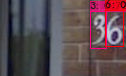

In [10]:
#test
!./darknet detector test /work1/svhn_HW2/obj.data /work1/svhn_HW2/yolov4_1124.cfg /work1/svhn_HW2/weights/yolov4_10000.weights test/499865.png
import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread('predictions.jpg')
cv2_imshow(image)

# STEP 4: Generate answer.json for submission on Codalab
The answer.json has the same format as [COCO dataset results](https://cocodataset.org/#format-results)

In [11]:
### Pseudo code for generating submission file

In [12]:
import os
data_listdir = os.listdir("test")
data_listdir.sort(key = lambda x: int(x[:-4]))

f = open('valid.txt','w')
for x in data_listdir:
  f.write('test/'+x)
  f.write('\n')
  print(x)
  f.close

串流輸出內容已截斷至最後 5000 行。
310733.png
310748.png
310751.png
310810.png
310840.png
310854.png
310913.png
310927.png
310994.png
311035.png
311045.png
311055.png
311061.png
311103.png
311190.png
311193.png
311195.png
311372.png
311377.png
311490.png
311525.png
311543.png
311594.png
311675.png
311799.png
311810.png
311858.png
311933.png
311977.png
312006.png
312010.png
312034.png
312074.png
312076.png
312091.png
312099.png
312111.png
312116.png
312159.png
312165.png
312175.png
312184.png
312185.png
312323.png
312362.png
312377.png
312403.png
312404.png
312412.png
312434.png
312448.png
312460.png
312491.png
312501.png
312547.png
312548.png
312551.png
312591.png
312607.png
312681.png
312706.png
312717.png
312780.png
312815.png
312843.png
312988.png
313042.png
313044.png
313053.png
313109.png
313152.png
313198.png
313258.png
313293.png
313310.png
313353.png
313406.png
313466.png
313532.png
313566.png
313777.png
313823.png
313836.png
313870.png
313897.png
313902.png
313917.png
313957.png
313979.png


In [13]:
import os
data_listdir = os.listdir("test")
data_listdir.sort(key = lambda x: int(x[:-4]))

f = open('valid.txt','w')
for x in data_listdir:
  f.write('test/'+x)
  f.write('\n')
  print(x)
  f.close

串流輸出內容已截斷至最後 5000 行。
310733.png
310748.png
310751.png
310810.png
310840.png
310854.png
310913.png
310927.png
310994.png
311035.png
311045.png
311055.png
311061.png
311103.png
311190.png
311193.png
311195.png
311372.png
311377.png
311490.png
311525.png
311543.png
311594.png
311675.png
311799.png
311810.png
311858.png
311933.png
311977.png
312006.png
312010.png
312034.png
312074.png
312076.png
312091.png
312099.png
312111.png
312116.png
312159.png
312165.png
312175.png
312184.png
312185.png
312323.png
312362.png
312377.png
312403.png
312404.png
312412.png
312434.png
312448.png
312460.png
312491.png
312501.png
312547.png
312548.png
312551.png
312591.png
312607.png
312681.png
312706.png
312717.png
312780.png
312815.png
312843.png
312988.png
313042.png
313044.png
313053.png
313109.png
313152.png
313198.png
313258.png
313293.png
313310.png
313353.png
313406.png
313466.png
313532.png
313566.png
313777.png
313823.png
313836.png
313870.png
313897.png
313902.png
313917.png
313957.png
313979.png


一定要加 -dont_show

不然不知道為甚麼只會讀到valid.txt的第一行

加-dont_show才可以讀到valid.txt所有檔案

In [14]:
!./darknet detector test /work1/svhn_HW2/obj.data /work1/svhn_HW2/yolov4_1124.cfg /work1/svhn_HW2/weights/yolov4_10000.weights -dont_show -ext_output < valid.txt > result.txt 

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   9 route  8 2 	                           ->  208 x 208 x 128 
  10 conv

In [15]:
import json
result_to_json = []

f = open('result.txt')
save = False
img_id = ''
for line in f.readlines():
  if 'test/' in line:
    result = line.split()
    save = True
    img_id = result[0][:-5]
    img_id = int(img_id[5:])
  elif save == True and '%' in line:
    result = line.split()
    label = result[0][:-1]
    if '10' in label:
      label = '0'
    label = int(label)
    score = float(result[1][:-1])/100 
    x = float(result[3])
    y = float(result[5])
    w = float(result[7])
    h = float(result[9][:-1])
    #print('img_id:'+img_id+' label:'+label+' score:'+score+ ' x:'+x+' y:'+y+' w:'+w+' h:'+h)

    det_box_info = {}
    det_box_info["image_id"] = img_id
    det_box_info["bbox"] = [x,y,w,h]
    det_box_info["score"] = score
    det_box_info["category_id"] = label
        
    result_to_json.append(det_box_info)


  elif save == True and 'Enter' in line:
    save = False
f.close()

# Write the list to answer.json 
json_object = json.dumps(result_to_json, indent=4)

with open("answer.json", "w") as outfile:
  outfile.write(json_object)

# STEP 5: Run inferene and bench mark

### Please **screenshot** this cell, including the code and the output (your inference time), and put it into your report.

In [16]:
import os
f = open('benchmark.txt','w')

TEST_IMAGE_NUMBER = 100 # This number is fixed.


# Read image (Be careful with the image order)
data_listdir = os.listdir("test")
data_listdir.sort(key = lambda x: int(x[:-4]))
for img_name in data_listdir[:TEST_IMAGE_NUMBER]:

  f.write('test/'+img_name)
  f.write('\n')
  f.close


I don’t know why sometimes writing a txt file is unsuccessful, 

so I execute it twice just in case.

In [17]:
import os
f = open('benchmark.txt','w')

TEST_IMAGE_NUMBER = 100 # This number is fixed.


# Read image (Be careful with the image order)
data_listdir = os.listdir("test")
data_listdir.sort(key = lambda x: int(x[:-4]))
for img_name in data_listdir[:TEST_IMAGE_NUMBER]:

  f.write('test/'+img_name)
  f.write('\n')
  f.close

In [18]:
start_time = time.time()
!./darknet detector test /work1/svhn_HW2/obj.data /work1/svhn_HW2/yolov4_1124.cfg /work1/svhn_HW2/weights/yolov4_10000.weights -dont_show -ext_output < benchmark.txt > result.txt 

end_time  = time.time()
print("\nInference time per image: ", (end_time - start_time) / 100)

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   9 route  8 2 	                           ->  208 x 208 x 128 
  10 conv

# STEP 6: Share this notebook link on your GitHub/GitLab Readme.MD
Click the share on the right top buttom 